#Mouse Navigating Maze in Virtual Reality

## Setup evnironment and plotting

In [2]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set_context('notebook')

## Load covariates and maze information

In [3]:
basePath = '/Users/MJAY-MAC/Desktop/mVR-example-master 2'

In [4]:
with open(os.path.join(basePath,'covariates.json')) as fp:    
    params = pd.DataFrame(json.load(fp))

In [5]:
maze = np.load(os.path.join(basePath,'maze.npy')).transpose(2, 0, 1)
reward = np.load(os.path.join(basePath,'reward.npy'))

## Plot maze and trajectory through maze

A maze consists of trapazoidal patches, called `branches`, which are stiched together.

There is also one reward location, which is also a trapazoidal patch.

In [64]:
def draw(maze, reward):
    for branch in maze:
        plt.fill(branch[0,:], branch[1,:], edgecolor=[0.7,0.7,0.7], facecolor=[0.7,0.7,0.7], lw=1.5);
    plt.fill(reward[0], reward[1], edgecolor=[0.9,0.9,0.9], facecolor=[0.9,0.9,0.9]);
    plt.axis('off')
    #print branch

[[ 45.6  45.6  75.5  75.5]
 [ 85.4  95.4  95.4  85.4]]


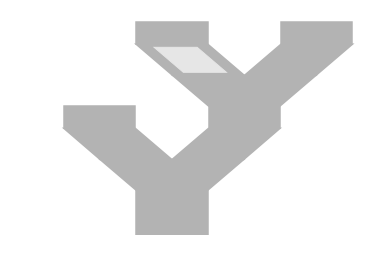

In [65]:
draw(maze, reward)

In [40]:
def trace(params, trial):
    if not isinstance(trial, (list, tuple)):
        trial = [trial]
    for t in trial:
        plt.plot(params.xMazePos[params.trialNum == t],params.yMazePos[params.trialNum == t]);
        print t

[[ 45.6  45.6  75.5  75.5]
 [ 85.4  95.4  95.4  85.4]]


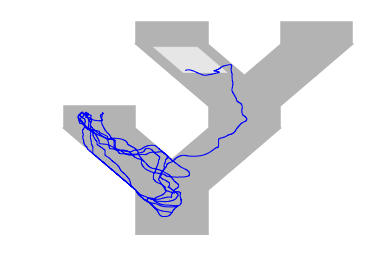

In [78]:
draw(maze, reward)
trace(params, 2)

[[ 45.6  45.6  75.5  75.5]
 [ 85.4  95.4  95.4  85.4]]


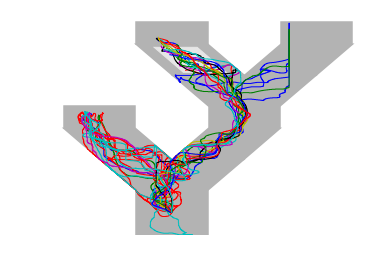

In [79]:
draw(maze, reward)
trace(params, range(0,18))

In [80]:
params['corNorm'] = params.corPos/params.corWidth

In [163]:
trials = params.groupby(params.trialNum).mean()

(array([  1.,   0.,   0.,  10.,  12.,  24.,  15.,  23.,  19.,  10.]),
 array([ 0.31832195,  0.35998703,  0.4016521 ,  0.44331717,  0.48498225,
         0.52664732,  0.5683124 ,  0.60997747,  0.65164254,  0.69330762,
         0.73497269]),
 <a list of 10 Patch objects>)

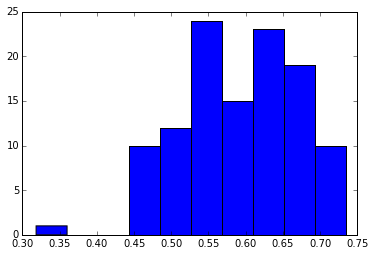

In [46]:
plt.hist(trials.corNorm)

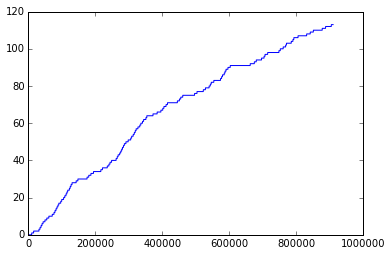

In [47]:
plt.plot(params.trialNum)

In [162]:
params.trialNum[36]

0

In [74]:
params.xMazePos[36]

0.0

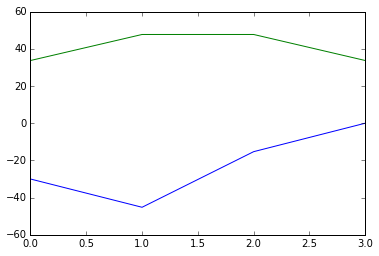

In [98]:
plt.plot(maze[2].T)

In [70]:
maze


array([[[-15. , -15. ,  15. ,  15. ],
        [  0. ,  20. ,  20. ,   0. ]],

       [[-15. , -30. ,  30. ,  15. ],
        [ 20. ,  33.7,  33.7,  20. ]],

       [[-30. , -45.2, -15.3,   0. ],
        [ 33.7,  47.7,  47.7,  33.7]],

       [[  0. ,  15.3,  45.2,  30. ],
        [ 33.7,  47.7,  47.7,  33.7]],

       [[-45.2, -45.2, -15.3, -15.3],
        [ 47.7,  57.7,  57.7,  47.7]],

       [[ 15.3,  15.3,  45.2,  45.2],
        [ 47.7,  57.7,  57.7,  47.7]],

       [[ 15.3,   0.3,  60.2,  45.2],
        [ 57.7,  71.4,  71.4,  57.7]],

       [[  0.3, -15. ,  15. ,  30.3],
        [ 71.4,  85.4,  85.4,  71.4]],

       [[ 30.3,  45.6,  75.5,  60.2],
        [ 71.4,  85.4,  85.4,  71.4]],

       [[-15. , -15. ,  15. ,  15. ],
        [ 85.4,  95.4,  95.4,  85.4]],

       [[ 45.6,  45.6,  75.5,  75.5],
        [ 85.4,  95.4,  95.4,  85.4]]])

In [ ]:
import matplotlib.path as mPath
def correct(params,trial,trials):
    three = mPath.Path(np.array(maze[2].T)) #first left incorrect branch
    nine = mPath.Path(np.array(maze[8].T)) #right right incorrect branch
    
    if not isinstance(trial, (list, tuple)):
            trial = [trial]
    for t in trial:
        coords = np.array([[params.xMazePos[params.trialNum == t]],[params.yMazePos[params.trialNum == t]]])
        #^whole trajectory of animal
        print coords.T
        print coords.T[15000][0][1]
        print len(coords.T)
        
        for pt in coords.T:
            #print pt[0][0] 
            
            if three.contains_point((pt[0][0],pt[0][1])):
                trials['correctTrack'][t] = 0
            else:
                trials['correctTrack'][t] = 1
       
            
correct(params,2,trials)   

In [ ]:
trials
